<a href="https://colab.research.google.com/github/BeUnique21/sms_spam_classifier/blob/main/SMS_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt



**Load and Explore Data**

In [ ]:
# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

# Display the first few rows of the data
print(data.head())



     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


**Split the Data into Training and Testing Sets**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)


**Build and Train the Model**

In [ ]:
# Build and train the model
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

**Make Predictions and Evaluate the Model**

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9838565022421525
Confusion Matrix:
 [[963   2]
 [ 16 134]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



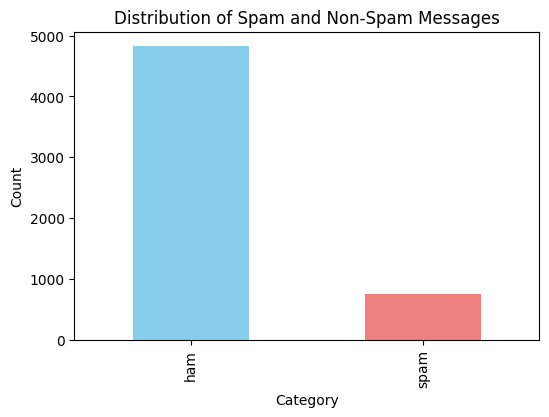

In [ ]:
plt.figure(figsize=(6, 4))
data['v1'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Take user input to classify SMS as Spam or Ham**

In [ ]:
user_input = input("Enter an SMS message to classify: ")
user_input_processed = [user_input]  # Process the user input if needed

# Make prediction for user input
user_prediction = model.predict(user_input_processed)
print(f"The model predicts: {user_prediction[0]}")

Enter an SMS message to classify: FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com
The model predicts: spam
